#   

# 作業目標:

    1. 藉由固定的 dataset, 來驗證不同loss function
    2. Dataset 的特性跟我們選用的loss function 對accrancy 的影響
    
    
# 作業重點: 
    請分別選用 "MSE", "binary _crossentropy"
    查看Train/test accurancy and loss rate
    

# 導入必要的函數

In [51]:
from keras.datasets import cifar10
import numpy as np
np.random.seed(10)
import matplotlib.pyplot as plt
%matplotlib inline

# 資料準備

In [52]:
#取得Keras Dataset
(x_img_train,y_label_train),(x_img_test,y_label_test)=cifar10.load_data()

In [53]:
#確認 CIFAR10 Dataset 資料維度
print("train data:",'images:',x_img_train.shape,
      " labels:",y_label_train.shape) 
print("test  data:",'images:',x_img_test.shape ,
      " labels:",y_label_test.shape)

train data: images: (50000, 32, 32, 3)  labels: (50000, 1)
test  data: images: (10000, 32, 32, 3)  labels: (10000, 1)


In [54]:
#資料正規化
x_img_train_normalize = x_img_train.astype('float32') / 255.0
x_img_test_normalize = x_img_test.astype('float32') / 255.0

In [55]:
#針對Label 做 ONE HOT ENCODE
from keras.utils import np_utils
y_label_train_OneHot = np_utils.to_categorical(y_label_train)
y_label_test_OneHot = np_utils.to_categorical(y_label_test)
y_label_test_OneHot.shape

(10000, 10)

# 建立模型

In [56]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D

In [57]:
# 宣告採用序列模型
model = Sequential()

# 卷積層1 - filters=32
# 與池化層1
model.add(Conv2D(filters=32, kernel_size=(3,3), input_shape=(32, 32,3), activation='relu', padding='same'))
model.add(Dropout(rate=0.25)) # Dropout
model.add(MaxPooling2D(pool_size=(2, 2)))


# 卷積層2 - filters=64
# 與池化層2
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(Dropout(rate=0.25)) # Dropout
model.add(MaxPooling2D(pool_size=(2, 2)))



"""# 建立神經網路(平坦層、隱藏層、輸出層)"""
model.add(Flatten())
model.add(Dropout(rate=0.25)) # Dropout

""" 1. fully connected layer """
# 建立全網路連接層
model.add(Dense(1024, activation='relu'))
model.add(Dropout(rate=0.25)) # Dropout

""" 2. output layer """
#建立輸出層
model.add(Dense(10, activation='softmax'))



#檢查model 的STACK
print(model.summary())

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
dropout_13 (Dropout)         (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
dropout_14 (Dropout)         (None, 16, 16, 64)        0         
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 4096)             

# 載入之前訓練的模型

In [58]:
try:
    model.load_weights("SaveModel/cifarCnnModel.h5")
    print("載入模型成功!繼續訓練模型")
except :    
    print("載入模型失敗!開始訓練一個新模型")

載入模型失敗!開始訓練一個新模型


# 訓練模型

In [60]:
model.compile(loss='MSE', optimizer='sgd', metrics=['accuracy'])

In [61]:
#模型訓練, "Train_History" 把訓練過程所得到的數值存起來
train_history=model.fit(x_img_train_normalize, y_label_train_OneHot,
                        validation_split=0.25,
                        epochs=12, batch_size=128, verbose=1)         

#[validation_split = 0.2] validation_split：在0和1之間浮動。用作驗證數據的訓練數據的分數。
#該模型將訓練數據的這一部分分開，不會對其進行訓練，並將在每個時期結束時評估該數據的損失和任何模型指標。
#[batch_size]：整數或None。每個梯度更新的樣本數。指定，batch_size為128

Train on 37500 samples, validate on 12500 samples
Epoch 1/12
37500/37500 [==============================] - 88s 2ms/step - loss: 0.0903 - accuracy: 0.0999 - val_loss: 0.0899 - val_accuracy: 0.1152
Epoch 2/12
37500/37500 [==============================] - 83s 2ms/step - loss: 0.0901 - accuracy: 0.1057 - val_loss: 0.0898 - val_accuracy: 0.1319
Epoch 3/12
37500/37500 [==============================] - 89s 2ms/step - loss: 0.0900 - accuracy: 0.1124 - val_loss: 0.0898 - val_accuracy: 0.1411
Epoch 4/12
37500/37500 [==============================] - 85s 2ms/step - loss: 0.0898 - accuracy: 0.1160 - val_loss: 0.0897 - val_accuracy: 0.1524
Epoch 5/12
37500/37500 [==============================] - 86s 2ms/step - loss: 0.0898 - accuracy: 0.1237 - val_loss: 0.0896 - val_accuracy: 0.1625
Epoch 6/12
37500/37500 [==============================] - 83s 2ms/step - loss: 0.0896 - accuracy: 0.1255 - val_loss: 0.0896 - val_accuracy: 0.1710
Epoch 7/12
37500/37500 [==============================] - 84s 2ms/st

## 作業:
請分別選用 "MSE", "binary _crossentropy"
查看Train/test accurancy and loss rate

In [65]:
import matplotlib.pyplot as plt
%matplotlib inline
#定義一個繪圖函數
def show_train_history(train_acc,test_acc):
      plt.plot(train_history.history[train_acc])
      plt.plot(train_history.history[test_acc])
      plt.title('Train History')
      plt.ylabel('Accuracy')
      plt.xlabel('Epoch')
      plt.legend(['train_acc', 'val_loss'], loc='upper left')
      plt.show()


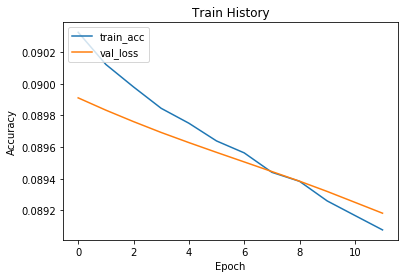

In [75]:

show_train_history('loss','val_loss')